# Machine Learning 2022-2023 - UMONS

# Introduction to regression and classification with Scikit-Learn

This notebook is an introduction to the library scikit-learn (https://scikit-learn.org/stable/), which provides numerous tools to easily perform machine learning tasks. 

In this lab, we'll experiment with two of the most frequently encountered tasks in machine learning : 
  - Regression : predicting a continuous variable given a set of predictors. 
  - Classification : predicting the class of a sample given a set of predictors.

In order for you to first have a good feeling of the general pipeline of a machine learning task, we'll experiment on the Pokemon dataset with two simple models : a linear regression, and a K-nearest neighbors classifier. 

**Import the necessary libraries**

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

**Load the 'Pokemon.csv' dataset as a Pandas Dataframe, change the Type 1 and Type 2 variables to categorical and replace 'Type 2' missing values by the corresponding value of the 'Type 1' variable.**

In [12]:
## Read csv and load Pandas Dataframe.

df = pd.read_csv('data/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [13]:
## Change variables types

print(df.dtypes)

df = df.astype({'Type 1': 'category', 'Type 2': 'category', 'Generation': 'category'})

print(df.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object
#                int64
Name            object
Type 1        category
Type 2        category
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Generation    category
Legendary         bool
dtype: object


In [14]:
## Check for any missing values, replace them with the corresponding value of the 'Type 1' variable.

print(df.isna().sum())

df['Type 2'].fillna(df['Type 1'], inplace=True)

df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

**Select the target variable y as 'HP' and the predictor as 'Attack'. Create a scatter plot of the two variables.**

In [15]:
## Select a target variable y and a predictor X.

y = df[['HP']]
X = df[['Attack']]

<AxesSubplot:xlabel='Attack', ylabel='HP'>

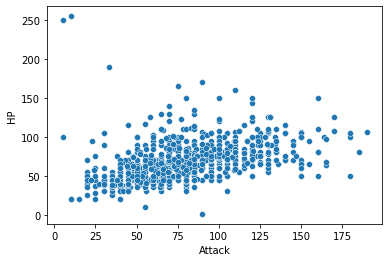

In [16]:
## Create the scatter plot.

sns.scatterplot(x='Attack', y='HP', data=df)

**Split the dataset into training and test sets following an 80%/20% partition.**

In [17]:
# Define a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, shuffle=True, random_state=0
)

print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

((640, 1), (640, 1)) ((160, 1), (160, 1))


**Build a linear regression model and fit it to the training data.**

In [18]:
## Define the linear regression model.

model = LinearRegression(fit_intercept=True)

In [19]:
## Fit the model to the training data.

model.fit(X_train, y_train)

LinearRegression()

**Compute the mean squared error (MSE) on both the training and test sets.**

In [20]:
## Make predictions for both the training and the test sets.

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Compute the coefficient of determination and the mean square error on both sets.

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE on training set : {MSE_train}')
print(f'MSE on test set : {MSE_test}')

MSE on training set : 486.516731125372
MSE on test set : 732.011222397552


**Plot the regression line**

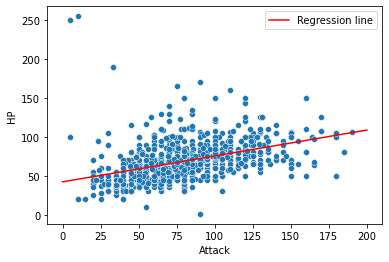

In [21]:
## Generate predictions out of the fitted model.

xfit = np.linspace(0, 200)
xfit = xfit[:, np.newaxis]
yfit = model.predict(xfit)

## Plot the regression line.

fig, ax = plt.subplots()
ax = sns.scatterplot(x='Attack', y='HP', data=df)
ax.plot(xfit, yfit, label='Regression line', color='red')
ax.legend()

## Regression task with a Linear Regression model. 

**1) Your turn ! Select 'Attack' and 'Defense' as predictor variables, and 'HP' as target variable.**

**2) Split the dataset into a training and a test set. Follow an 80%/20% split partition, and make sure the dataset is shuffled.** 

**3) Fit a Linear Regression model to the training data.** 

**4) What is the expression of the fitted model ? You need to access the model's parameters to answer this question.**

**5) Using the fitted Linear Regression model, predict the values of the target variable 'HP' in the training and test sets.**

**6) For both the training and test sets, evaluate the model's predictions using the Mean Squared Error (MSE). What do you observe ?**

**7) Consider the variable 'Generation' as additional predictor. What is the data type of this variable, and how would you treat it ?**

**7.1) Retrieve the categories of the variable 'Generation'.**

**7.2) Create a variable 'X' containing the predictors 'Attack', 'Defense', and 'Generation', and a variable 'y' containing the target variable 'HP'.**

**7.3) Split the dataset intro training and test sets following a 80/20 partition.**

**7.4) Create a 'One Hot Encoding' for each category of the variable 'Generation'. The one-hot-encoder should be fit exclusively to the training set, while the test set should only be transformed. 
Look up the class OneHotEncoder of Scikit-Learn, as well as the methods 'fit_transform' and 'transform'. Make sure to drop the first category and to ignore unknown category in the test set.**

**7.4) Fit the Linear Regression model to the training set, and get the model's coefficients. How does the model write now ?**

**7.5) Predict the MSE on the training and test sets.**

## Classification Task with a KNN classifier.

**8) Plot two scatter plots with:**
- **'Attack' on the x-axis, 'HP' on the y-axis'.**
- **'Attack' on the x-axis, 'Defense' on the y-axis.**

**Indicate legendary and non-legendary Pokemons with a color. What do you observe?**

**9) Use the `KNeighborsClassifier` class of scikit-learn with 5 neighbors to predict whether a Pokemon is legendary or not, using the variables 'Attack', 'Defense', and 'HP' as features. To this end, apply the following steps:**
- **Select the features and the target variable. Make sure that the data type of 'Legendary' is set to 'int'.**
- **Split your dataset into a training and test set following a 80%/20% partition.**
- **Fit the model to the training set, and predict the variable 'Legendary' on the training and test sets.**

**10) Compute the accuracy score of the model's predictions on the training and test sets using the function `accuracy_score`.** 

**11) Look at the distribution of the variable 'Legendary' in the training and test dataset using `sns.countplot`. What do you observe?**

**12) Get the confusion matrix of the predictions on the test set using the `confusion_matrix` function. What do you observe and how do you link your observations to the accuracy of the model?**